# ***Praktikum 1***

## KMeans
KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah kk yang dipilih.

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

* Persiapan Library dan Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../Data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* Seleksi Fitur

In [12]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

print(X.head())
print("")
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


* Membuat Scatter Plot

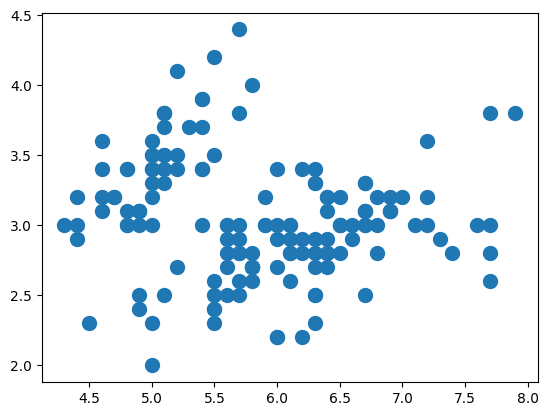

In [13]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

* Membuat Model KMeans

In [14]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

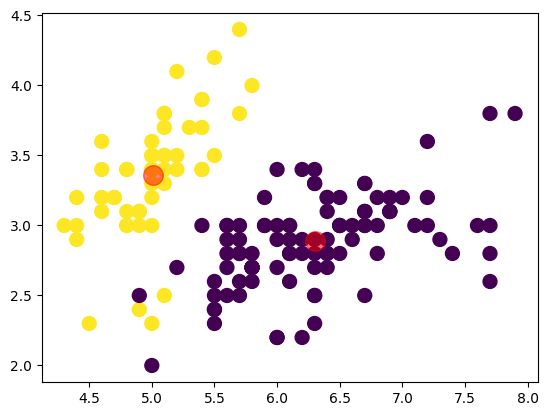

In [15]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* Cek Nilai SSE

In [16]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


* Implementasi Metode Elbow

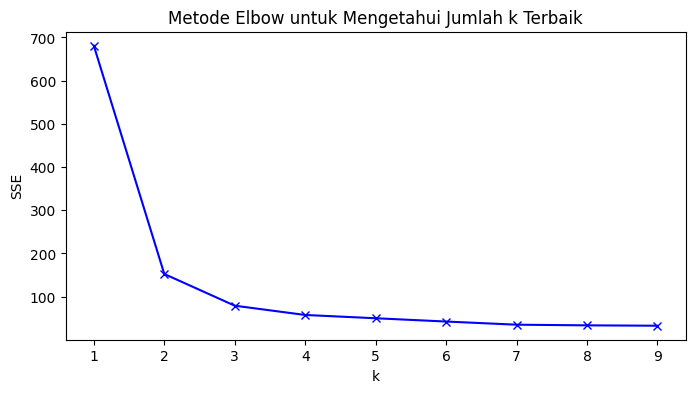

In [17]:

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

* Cek nilai SSE setiap k

In [18]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.9450658259773
k=4; SSE=57.473273265494925
k=5; SSE=49.87643095780262
k=6; SSE=42.277798989899
k=7; SSE=34.96196388127258
k=8; SSE=33.45321965385188
k=9; SSE=32.588187261268146


# ***Praktikum 2***

* import Library yang dibutuhkan

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


## K-MEANS Method

* Lakukan tampilan blob

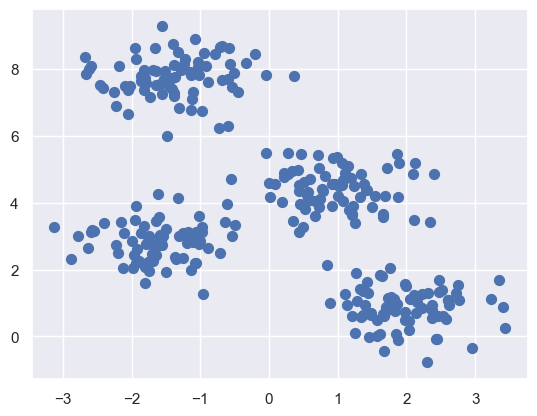

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

* Lakukan import k means

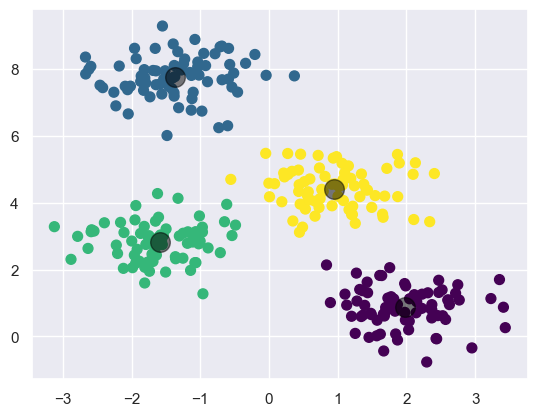

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Algoritma Expectation-Maximization

* Lakukan import pairwise dari library sklearn

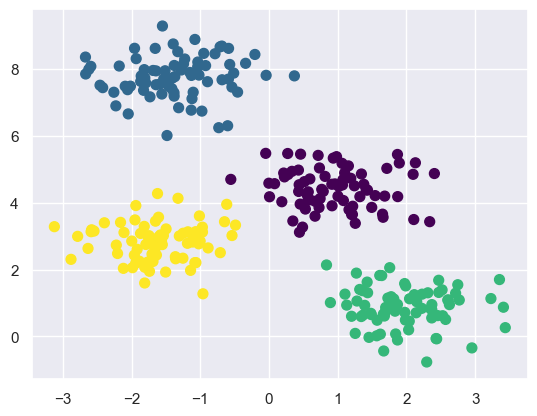

In [22]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

* Simulasikan perubahan random

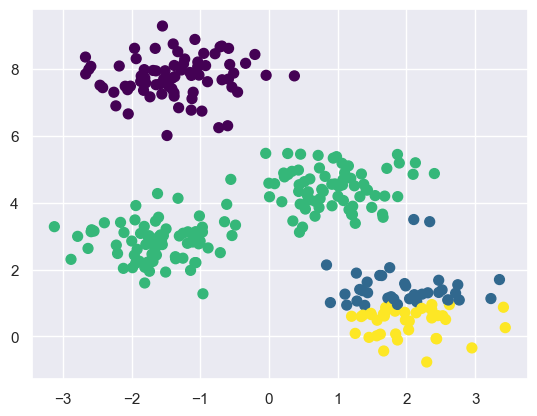

In [23]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

* Lakukan optimalisasi jumlah cluster

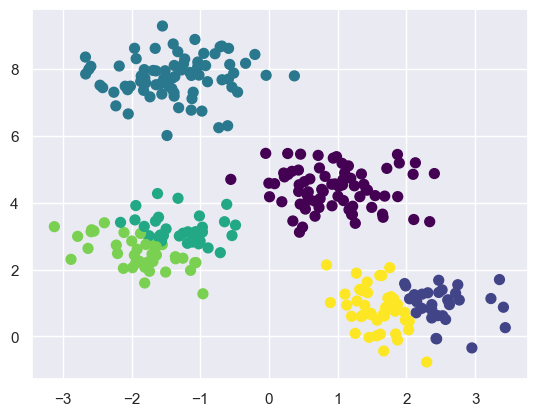

In [24]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

* pembuktian batas kluster tidak selalu liner

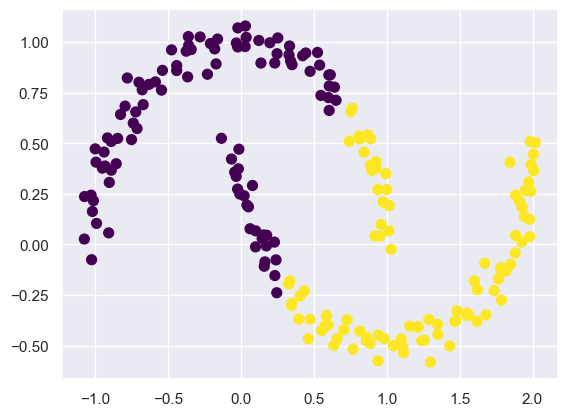

In [25]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

* Pisahkan data yang ada

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


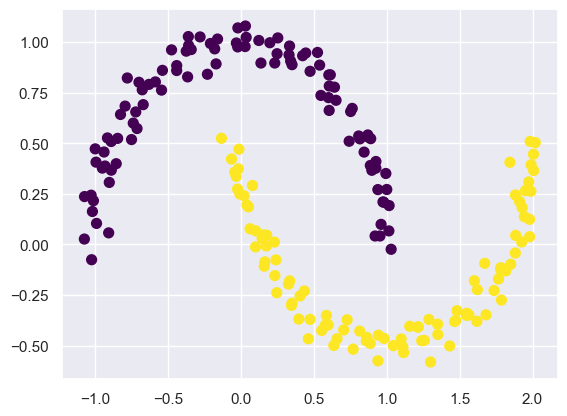

In [26]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Contoh kasus: Karakter angka

* Import digits dari sklearn

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

* Terapkan metode k-learns

In [28]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

* Tampilkan data

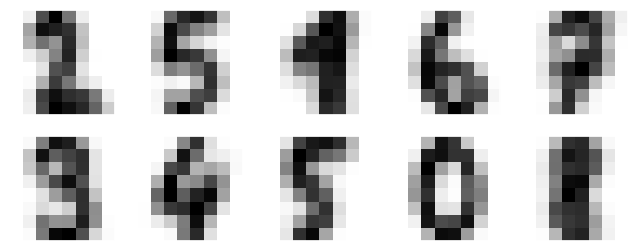

In [29]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

* Lakukan pelabelan Masking

In [30]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

* Lakukan penghitungan skor keakuratan

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

* buat diagram prediksi

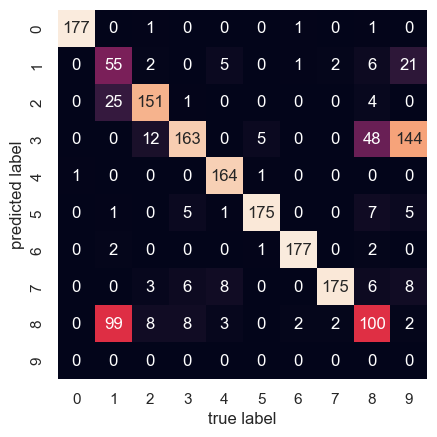

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

* Hitung TSNE dengan menggunakan metode K-Means dan keakurasian nya

In [33]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

## Studi Kasus: Kompresi citra

* lakukan load dataset

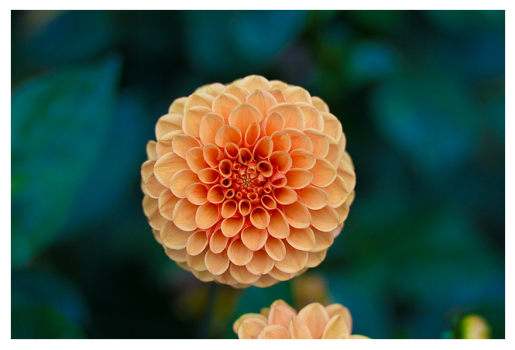

In [34]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

* Lakukan penghitungan dimensi gambar

In [35]:
flower.shape

(427, 640, 3)

* Lakukan normalisasi data

In [36]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

* Lakukan plotting warna menggunakan data yang ada 

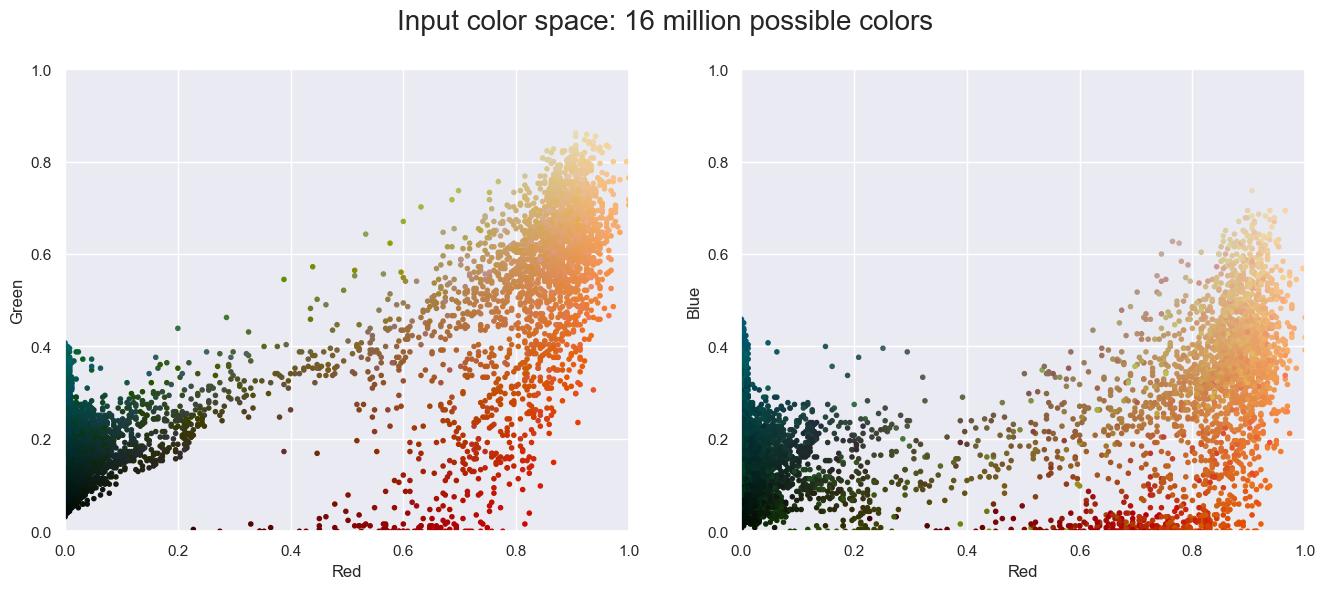

In [37]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
plot_pixels(data, title='Input color space: 16 million possible colors')

* Lakukan reduction warna yang ada

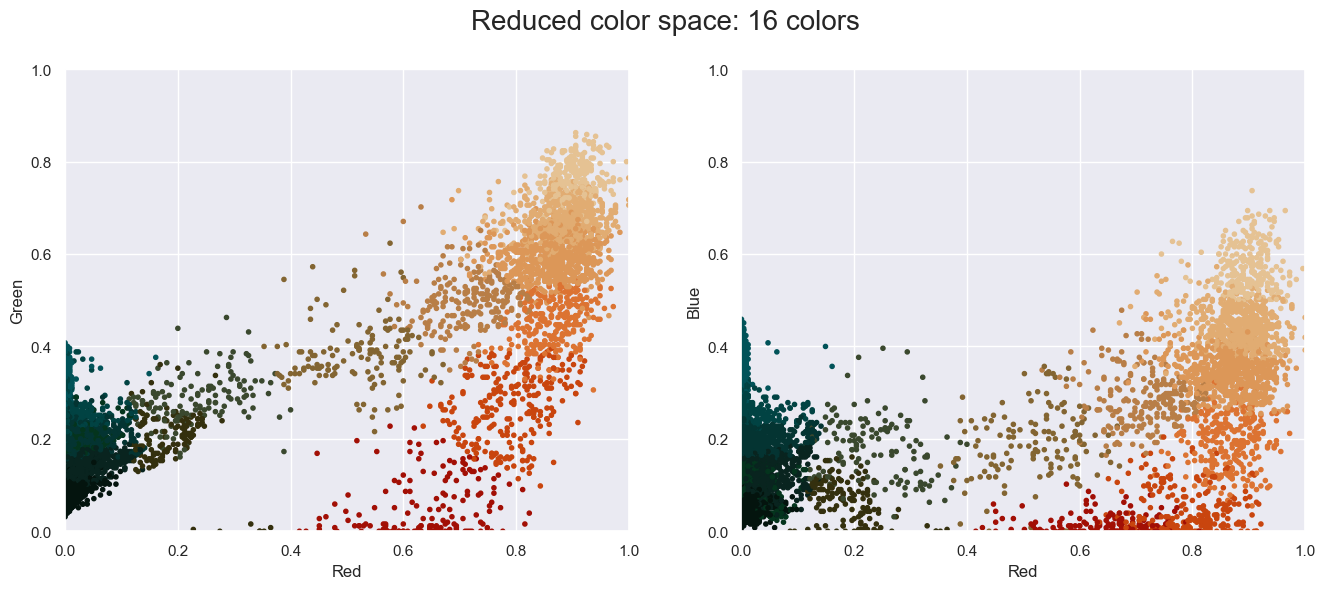

In [38]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

* Lakukan pewarnaan kembali pada image yang ada setelah dilakukan reduksi

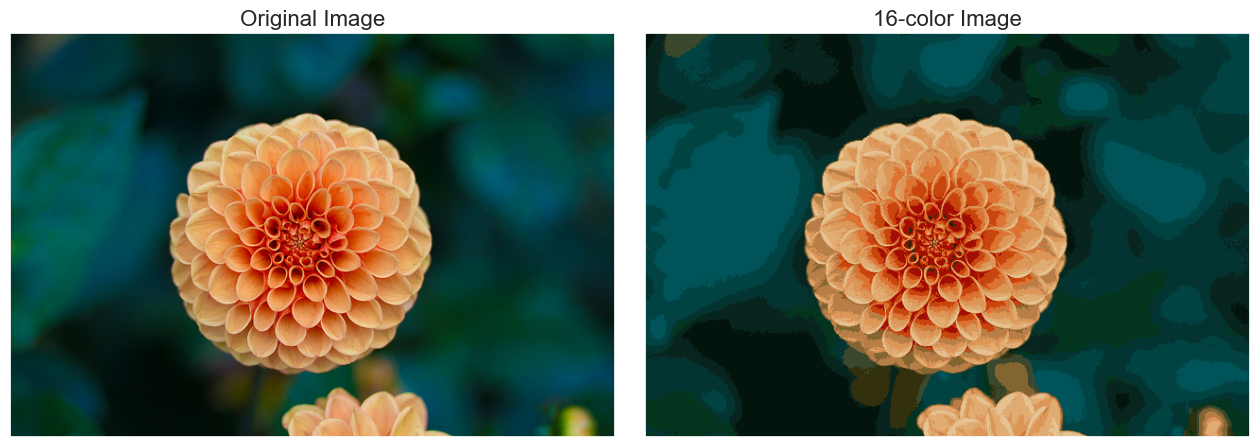

In [39]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# ***Praktikum 3***

## Pembuatan data sintesis

* Ambil dataset blob dari sklearn sebagai bahan

In [40]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

* Validasi data yang ada

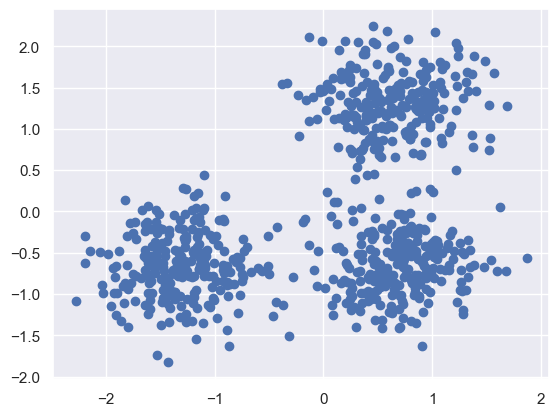

In [41]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

* Terapkan DBSCAN Computing method

In [42]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


* Evaluasi kualitas klasterasisasi

In [43]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


## Visualisasi hasil klasterasi 

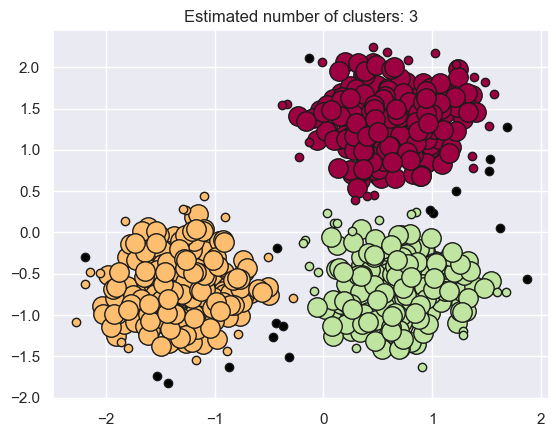

In [44]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# ***Tugas Praktikum***

1. Buatlah sebuah model K-Means dengan ketentuan,
Gunakan data 'Mall_Customers.csv' Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2) Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../Data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* cek kekosongan data

In [46]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* Seleksi fitur

In [47]:
X = df.iloc[:, [3, 4]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* buat plotting dengan scatter

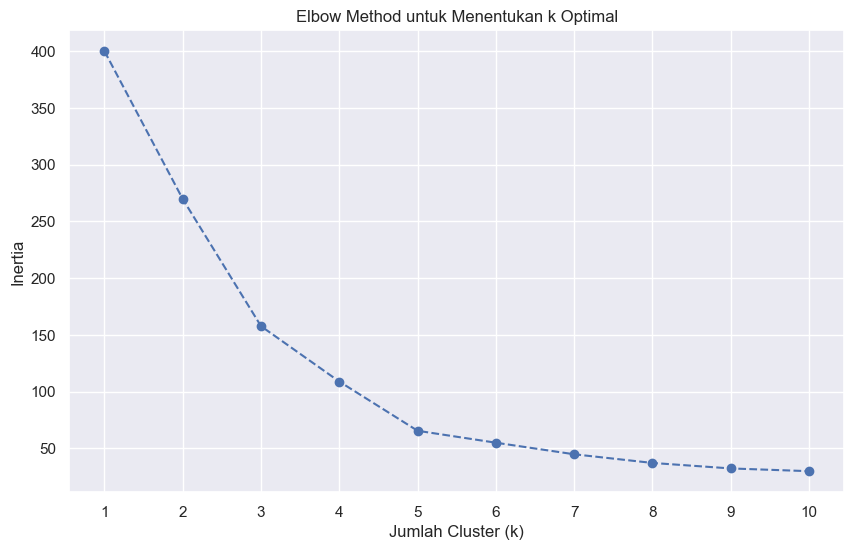

In [48]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

* Buat model menjadi lebih akurat

In [49]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans
print("\nData dengan Label Cluster:")
df.head()


Data dengan Label Cluster:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


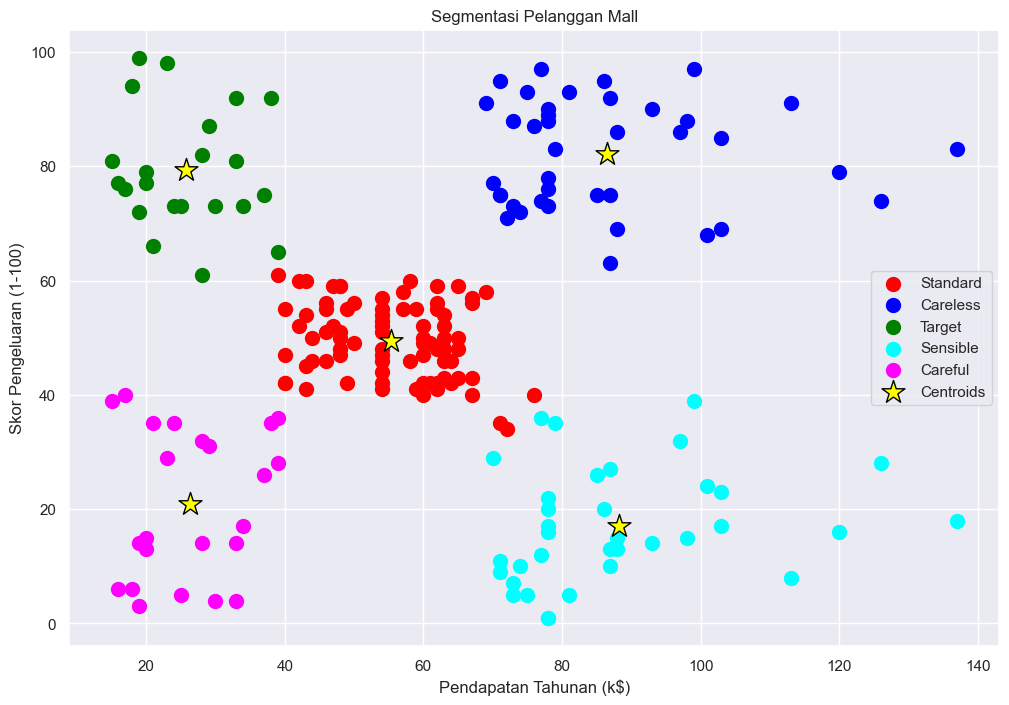

In [50]:

plt.figure(figsize=(12, 8))


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Careless')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Sensible')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Careful')


centroids = scaler.inverse_transform(kmeans.cluster_centers_)


plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='*', edgecolors='black')

plt.title('Segmentasi Pelanggan Mall')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.legend()
plt.grid(True)
plt.show()


2. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
Lakukan eksperimen:
eps = 0.05, 0.1, 0.3, 0.5
min_samples = 3, 10, 20
Catat perubahan klaster, noise, dan kualitas evaluasi.

In [51]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X,y_true = make_moons(n_samples=1000, noise=.05, random_state=0)

X_scaled = StandardScaler().fit_transform(X)

* Evaluasi Model yang ada

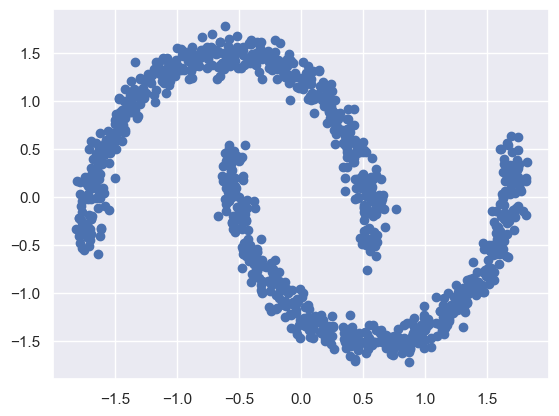

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.show()

* Terapkan DBSCAN Compute method

In [53]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X_scaled)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)



Estimated number of clusters: 2
Estimated number of noise points: 0


* Evaluasi metrik

In [54]:
from sklearn import metrics
print("Metrik Evaluasi:")
print(f"  Homogeneity: {metrics.homogeneity_score(y_true, labels):.3f}")
print(f"  Completeness: {metrics.completeness_score(y_true, labels):.3f}")
print(f"  V-measure: {metrics.v_measure_score(y_true, labels):.3f}")
print(f"  Adjusted Rand Index (ARI): {metrics.adjusted_rand_score(y_true, labels):.3f}")
print(f"  Adjusted Mutual Information (AMI): {metrics.adjusted_mutual_info_score(y_true, labels):.3f}")
print(f"  Silhouette Coefficient: {metrics.silhouette_score(X_scaled, labels):.3f}")



Metrik Evaluasi:
  Homogeneity: 1.000
  Completeness: 1.000
  V-measure: 1.000
  Adjusted Rand Index (ARI): 1.000
  Adjusted Mutual Information (AMI): 1.000


  Silhouette Coefficient: 0.392


* Visualisasi kan

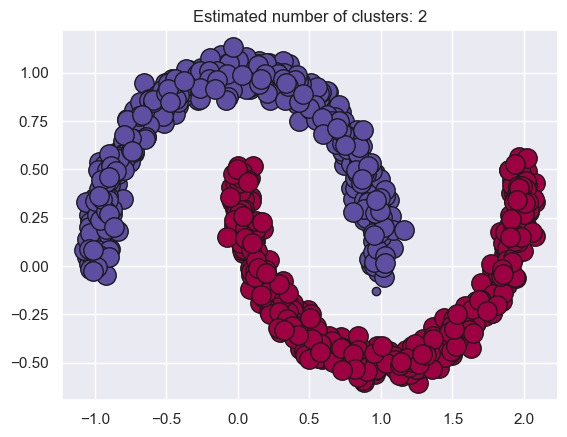

In [55]:
import numpy as np
import matplotlib.pyplot as plt 

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

* Uji sesuai parameter

In [56]:
import pandas as pd
# Daftar parameter untuk diuji
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []


print("--- Eksperimen dengan Epsilon (eps) ---")
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    labels = db.labels_
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    

    if n_clusters > 1:
        silhouette = metrics.silhouette_score(X_scaled, labels)
    else:
        silhouette = -1 
        
    results.append({
        'Parameter': 'eps',
        'Value': eps,
        'min_samples': 5,
        'Clusters': n_clusters,
        'Noise Points': n_noise,
        'ARI': metrics.adjusted_rand_score(y_true, labels),
        'Silhouette': silhouette
    })


print("\n--- Eksperimen dengan Min Samples ---")
for ms in min_samples_values:
    db = DBSCAN(eps=0.2, min_samples=ms).fit(X_scaled)
    labels = db.labels_
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = metrics.silhouette_score(X_scaled, labels)
    else:
        silhouette = -1
        
    results.append({
        'Parameter': 'min_samples',
        'Value': ms,
        'eps': 0.2,
        'Clusters': n_clusters,
        'Noise Points': n_noise,
        'ARI': metrics.adjusted_rand_score(y_true, labels),
        'Silhouette': silhouette
    })

df_results = pd.DataFrame(results)
print(df_results.to_string())

--- Eksperimen dengan Epsilon (eps) ---

--- Eksperimen dengan Min Samples ---
     Parameter  Value  min_samples  Clusters  Noise Points       ARI  Silhouette  eps
0          eps   0.05          5.0        51           444  0.013714   -0.102007  NaN
1          eps   0.10          5.0         3            21  0.848954    0.137335  NaN
2          eps   0.20          5.0         2             0  1.000000    0.391597  NaN
3          eps   0.30          5.0         2             0  1.000000    0.391597  NaN
4          eps   0.50          5.0         1             0  0.000000   -1.000000  NaN
5  min_samples   3.00          NaN         2             0  1.000000    0.391597  0.2
6  min_samples  10.00          NaN         2             0  1.000000    0.391597  0.2
7  min_samples  20.00          NaN         2             5  0.990018    0.183099  0.2


* Kesimpulan:
Dalam eksperimen diatas dapat di simpulkan bahwa dalam melakukan analisis dengan data dbscan sangat bergantung pada eps value serta noises dapat dilihat pada data diatas ketika melakukan percobaan data 0,5 kurang bagus sehingga kepadatan data juga sangat berpengaruh